# Task 1: Data pre-processing and data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.isnull().any().any()

False

a.  Use Pandas to load the data and report the number of data points (rows) in the dataset.

In [5]:
(rows,columns) = df.shape
print('number of rows are',rows)

number of rows are 4898


b.	Consider “quality” as class labels. Report the number of features in the dataset and the number of data 
        points in each class.

In [6]:
#features = total columns - 1(class label)
print('total number features are ',columns-1)

total number features are  11


In [7]:
print('number of data points in each class are:')
df.quality.value_counts().sort_index()

number of data points in each class are:


3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

c.	Perform random permutations of the data using the function, shuffle, from sklearn.utils. You must set a 
        value to the parameter, random_state. Assign the data to a new variable as white_wine.

In [8]:
from sklearn.utils import shuffle

white_wine = shuffle(df,random_state=25).reset_index(drop=True)

In [9]:
white_wine.head().reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8
1,6.9,0.58,0.58,8.2,0.032,29.0,169.0,0.99275,3.28,0.44,12.2,6
2,6.8,0.36,0.32,1.6,0.039,10.0,124.0,0.99480,3.30,0.67,9.6,5
3,5.8,0.30,0.27,1.7,0.014,45.0,104.0,0.98914,3.40,0.56,12.6,7
4,6.8,0.37,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.8,5


d.  Produce one scatter plot, that is, one feature against another feature. You are free to choose which two 
        features you want to use.

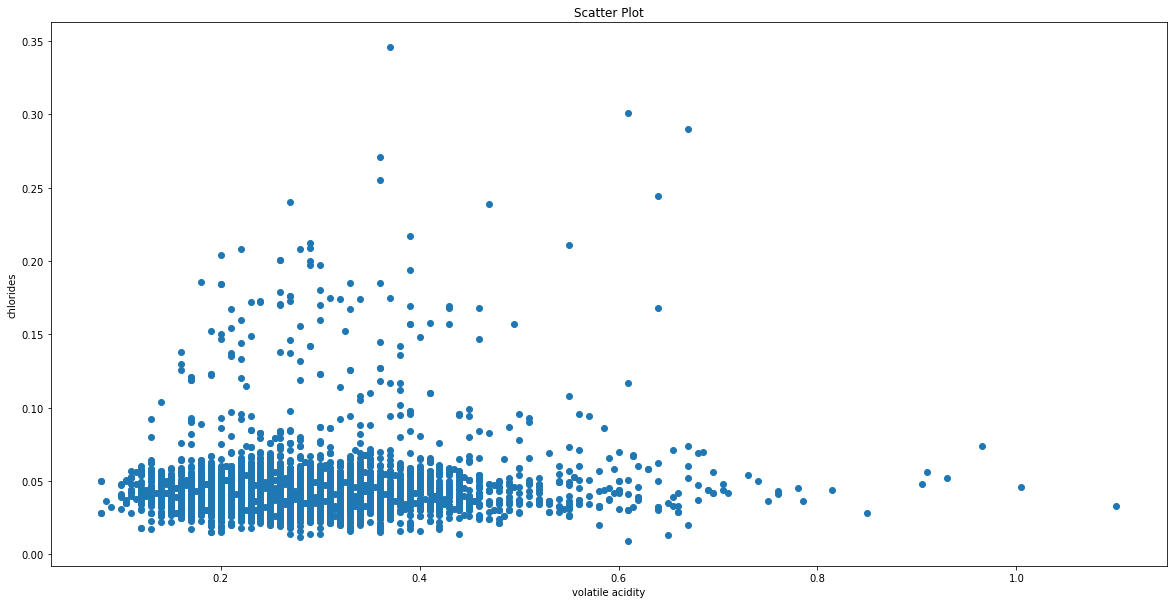

In [10]:
plt.figure(figsize=(20,10))
plt.xlabel('volatile acidity')
plt.ylabel('chlorides')
plt.title('Scatter Plot')
plt.scatter(x='volatile acidity',
           y='chlorides',
           data=white_wine)
plt.show()

# Task 2: PCA Analysis on the white-wine dataset Using Scikit-Learn

a.	Perform a PCA analysis on the whole white_wine dataset.

In [11]:
from sklearn.decomposition import PCA
 
pca = PCA(11)
 
#Transform the data
white_wine_pca = pca.fit_transform(white_wine.iloc[:,:-1])
 
white_wine_pca.shape

(4898, 11)

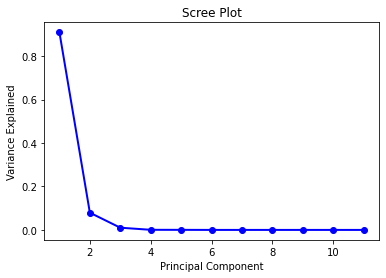

In [12]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

b.	Plot the data in the PC1 and PC2 projections and label/colour the data in the plot according to their class 
        labels.

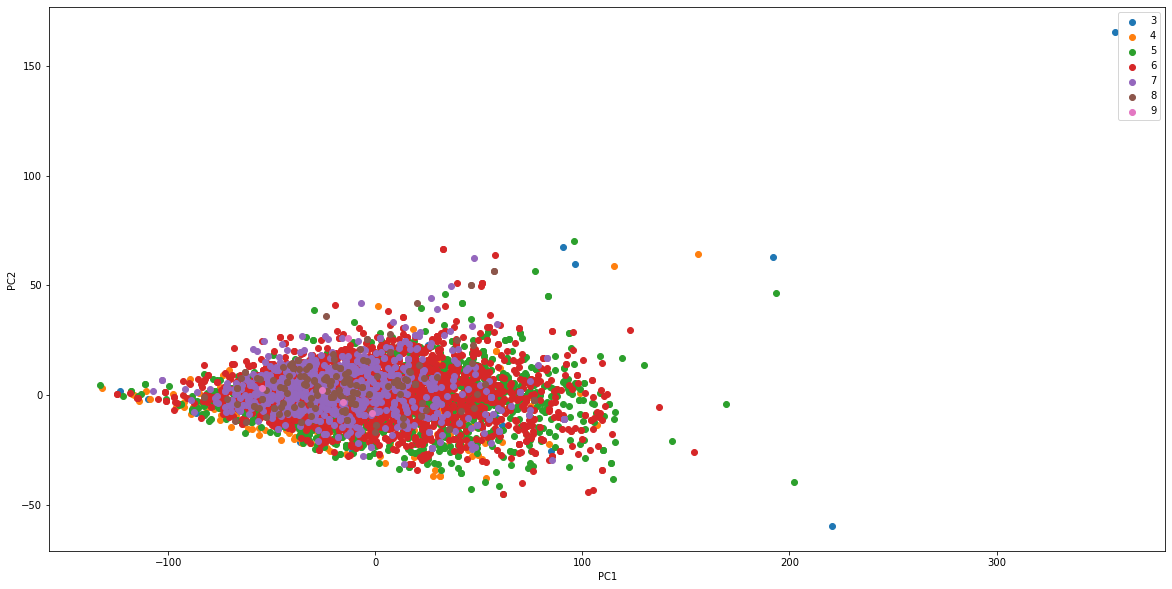

In [13]:
#Getting unique labels

label=white_wine['quality'] 
u_labels = np.unique(label)
 
#plotting the results:
 
plt.figure(figsize=(20,10))
for i in u_labels:
    plt.scatter(white_wine_pca[label == i , 0] , white_wine_pca[label == i , 1] , label = i)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

c.	Report the variance captured by each principal component.

In [14]:
print('variance captured by 11 principal compoents are',pca.explained_variance_ratio_)

variance captured by 11 principal compoents are [9.09657344e-01 7.93338631e-02 1.01542742e-02 5.06004450e-04
 3.23409395e-04 8.72769740e-06 6.72986618e-06 5.39060918e-06
 4.07002123e-06 1.86525322e-07 1.49217279e-10]


# Task 3: Divide the white_wine dataset into a training set, a validation set, and a test set.

a.	Take out the first 1000 rows from white_wine and save it as the validation set.

In [15]:
validation_set = white_wine[:1000]
validation_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8
1,6.9,0.58,0.58,8.2,0.032,29.0,169.0,0.99275,3.28,0.44,12.2,6
2,6.8,0.36,0.32,1.6,0.039,10.0,124.0,0.99480,3.30,0.67,9.6,5
3,5.8,0.30,0.27,1.7,0.014,45.0,104.0,0.98914,3.40,0.56,12.6,7
4,6.8,0.37,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.8,5


b.	Take out the last 1000 rows from white_wine and save it as the test set.

In [16]:
test_set = white_wine[:-1000]
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8
1,6.9,0.58,0.58,8.2,0.032,29.0,169.0,0.99275,3.28,0.44,12.2,6
2,6.8,0.36,0.32,1.6,0.039,10.0,124.0,0.99480,3.30,0.67,9.6,5
3,5.8,0.30,0.27,1.7,0.014,45.0,104.0,0.98914,3.40,0.56,12.6,7
4,6.8,0.37,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.8,5


c.	Save the rest of rows from white_wine as the training set.

In [17]:
train_set = white_wine[1000:-1000]
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,5.5,0.35,0.35,1.10,0.045,14.0,167.0,0.99200,3.34,0.68,9.9,6
1001,6.5,0.29,0.26,7.00,0.040,18.0,113.0,0.99366,3.17,0.38,10.2,6
1002,6.5,0.27,0.19,6.60,0.045,98.0,175.0,0.99364,3.16,0.34,10.1,6
1003,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,6
1004,5.7,0.18,0.22,4.20,0.042,25.0,111.0,0.99400,3.35,0.39,9.4,5
